********************************************************************
<b>Name</b>        : <i>Adesh Ashok Parab</i> <br>
<b>BITS ID</b>     : <i>2022AC05392</i> <br>
<b>Group</b>       : <i>ML Assignment Group 107</i> <br>
<b>Dataset</b>     : <i>Yeast</i> <br>
********************************************************************

<H2>Section: Import libraries and dataset</H2>

In [24]:
import pandas as pd
import seaborn as sn
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  

In [2]:
#Loading the dataset into Pandas Dataframe
mainDataset = pd.read_csv("Yeast.csv")

<H2>Section: Data visualisation and exploration</H2>

In [3]:
#Checking if the data is loaded, count and total columns etc.
mainDataset.shape

(1484, 9)

In [4]:
#The dataset contains 1484 rows and 9 columns.

In [5]:
#Printing sample data
mainDataset.head(2)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


In [6]:
#Printing sample data
mainDataset.tail(2)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


Additional information around the attributes in the dataset.

  1.  name: Name of the yeast.

  2.  mcg: McGeoch's method for signal sequence recognition.

  3.  gvh: von Heijne's method for signal sequence recognition.

  4.  alm: Score of the ALOM membrane spanning region prediction program.

  5.  mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.

  6.  erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.

  7.  pox: Peroxisomal targeting signal in the C-terminus.

  8.  vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.

  9.  nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.

In [7]:
mainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [8]:
mainDataset.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [9]:
mainDataset["name"].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

[Text(0.5, 0, 'Yeast Name'), Text(0, 0.5, 'Number of samples')]

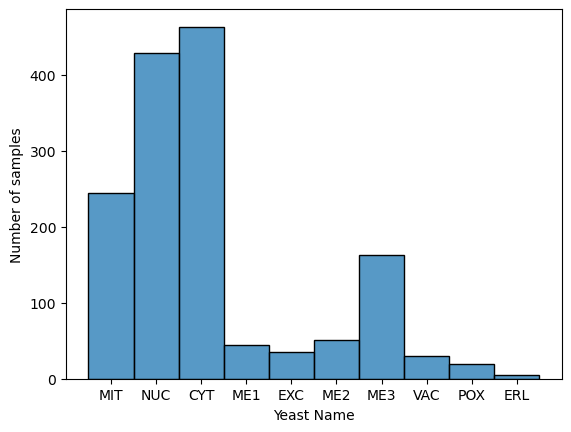

In [10]:
histogramYeast = sn.histplot(data=mainDataset, x="name")
histogramYeast.set(xlabel="Yeast Name", ylabel="Number of samples")

In [11]:
#We can see that the data is not evenly distributed over result classes. 
#There is an imbalance which we need to take care of.

<H2>Data preprocessing and cleaning</H2>

<font color=red><h2>Explain steps</h2></font>
<ol>
    <li>Changed datatype of "object" columns to provide more performant datatypes. (Step 12, 13)</li>
    <li>Checked if there are any missing values in the dataset. (Step 14, 15)</li>
</ol>

In [12]:
#Converting the "name" column from generic type object to categorical
mainDataset["name"] = pd.Categorical(mainDataset["name"])

In [13]:
#Note the change in datatype of "name" column
mainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mcg     1484 non-null   float64 
 1   gvh     1484 non-null   float64 
 2   alm     1484 non-null   float64 
 3   mit     1484 non-null   float64 
 4   erl     1484 non-null   float64 
 5   pox     1484 non-null   float64 
 6   vac     1484 non-null   float64 
 7   nuc     1484 non-null   float64 
 8   name    1484 non-null   category
dtypes: category(1), float64(8)
memory usage: 94.7 KB


In [14]:
#Checking null values in the data set
mainDataset.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [ ]:
#It can be seen from the above output that there are no null values.

<Axes: >

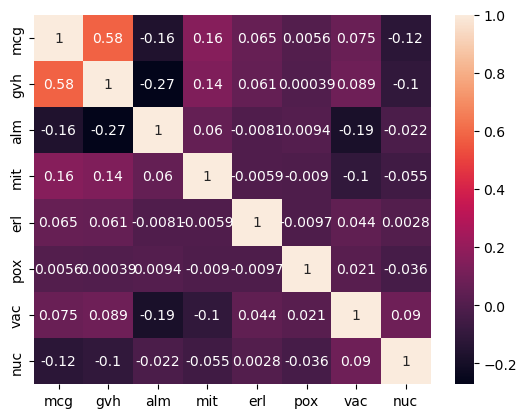

In [37]:
corrMatrix = mainDataset.corr(numeric_only=True)
sn.heatmap(corrMatrix, annot=True)

In [ ]:
#It can be seen that the "gvh" and "mcg" are correlated. Hence removing one of them.

In [38]:
mainDataset = mainDataset.drop(columns = ["mcg"])

In [39]:
mainDataset.head()

,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [40]:
#Splitting the data for training and testing.

In [41]:
y = mainDataset['name']
X = mainDataset.drop(columns = ['name'])

In [42]:
X.head()

,gvh,alm,mit,erl,pox,vac,nuc
0,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [43]:
y.head()

0    MIT
1    MIT
2    MIT
3    NUC
4    MIT
Name: name, dtype: category
Categories (10, object): ['CYT', 'ERL', 'EXC', 'ME1', ..., 'MIT', 'NUC', 'POX', 'VAC']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1187, 7) (297, 7)
(1187,) (297,)


In [45]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.5050505050505051

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.9,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(148, 7) (1336, 7)
(148,) (1336,)


In [47]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.469311377245509